# Task Data Scientist

In [1]:
import pandas as pd
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import numpy as np
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder

In [2]:
df = pd.read_csv("dataset.csv")

## 1. Preliminary questions

### a. Compute the mean and std of the data

In [3]:
print("Using aids")
print("==========")
print(f"Mean :{df['using_aids'].mean()}")
print(f"Std :{df['using_aids'].std()}\n\n")
print("Not using aids")
print("==========")
print(f"Mean :{df['not_using_aids'].mean()}")
print(f"Std :{df['not_using_aids'].std()}")

Using aids
Mean :26.9
Std :14.24741691988021


Not using aids
Mean :22.8
Std :11.593101396951552


### a. What is the null hypothesis of the experiment? What would be the alternate hypothesis?

Null hypothesis: government programs that provide monetary aid to those who receive
employment does not affect the likelihood of young people entering the workforce in X City

Alternate hypothesis: government programs that provide monetary aid to those who receive
employment influences the likelihood of young people entering the world of work in X City

### b. Compute the t-test for this experiment. Interpret your answer elaborately

In [4]:
t_statistic, p_value = stats.ttest_ind(df['using_aids'],df['not_using_aids'])

# Tampilkan hasil t-test
print("T-statistic:", t_statistic)
print("P-value:", p_value)

T-statistic: 0.7058598324591097
P-value: 0.48931100750438505


- nilai t-statistik sebesar 0.706 menunjukkan bahwa perbedaan rata-rata antara 2 kelompok ini tidak begitu besar
- nilai p-value sebesar 0.489 menunjukkan bahwa jika tidak ada perbedaan yang sebenarnya antara dua kelompok

### c.  Is there a significant difference between the two groups?


if the significance level is 0.05, we don't have enough
evidence to reject the null hypothesis because the p-value is greater than the significance level.
Therefore, based on these results, we cannot conclude that there is a significant difference
in the average number of unemployed young people who find work between
groups that receive financial assistance and those that do not.

## 2. Structural Protein Sequences

Using the [Structural Protein Sequences (kaggle.com)](https://www.kaggle.com/datasets/shahir/protein-data-set) dataset, create a protein
classifier. Write the solution into one Jupyter Notebook file, you may use SQL
and Python to do this. The solution must include answers to the following
questions

In [5]:
df = pd.read_csv("pdb_data_no_dups.csv")

In [6]:
df.head()

,structureId,classification,experimentalTechnique,macromoleculeType,residueCount,resolution,structureMolecularWeight,crystallizationMethod,crystallizationTempK,densityMatthews,densityPercentSol,pdbxDetails,phValue,publicationYear
0,100D,DNA-RNA HYBRID,X-RAY DIFFRACTION,DNA/RNA Hybrid,20,1.90,6360.30,"VAPOR DIFFUSION, HANGING DROP",NaN,1.78,30.89,"pH 7.00, VAPOR DIFFUSION, HANGING DROP",7.0,1994.0
1,101D,DNA,X-RAY DIFFRACTION,DNA,24,2.25,7939.35,NaN,NaN,2.00,38.45,NaN,NaN,1995.0
2,101M,OXYGEN TRANSPORT,X-RAY DIFFRACTION,Protein,154,2.07,18112.80,NaN,NaN,3.09,60.20,"3.0 M AMMONIUM SULFATE, 20 MM TRIS, 1MM EDTA, ...",9.0,1999.0
3,102D,DNA,X-RAY DIFFRACTION,DNA,24,2.20,7637.17,"VAPOR DIFFUSION, SITTING DROP",277.0,2.28,46.06,"pH 7.00, VAPOR DIFFUSION, SITTING DROP, temper...",7.0,1995.0
4,102L,HYDROLASE(O-GLYCOSYL),X-RAY DIFFRACTION,Protein,165,1.74,18926.61,NaN,NaN,2.75,55.28,NaN,NaN,1993.0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141401 entries, 0 to 141400
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   structureId               141401 non-null  object 
 1   classification            141399 non-null  object 
 2   experimentalTechnique     141401 non-null  object 
 3   macromoleculeType         137636 non-null  object 
 4   residueCount              141401 non-null  int64  
 5   resolution                128589 non-null  float64
 6   structureMolecularWeight  141401 non-null  float64
 7   crystallizationMethod     96242 non-null   object 
 8   crystallizationTempK      97039 non-null   float64
 9   densityMatthews           124724 non-null  float64
 10  densityPercentSol         124749 non-null  float64
 11  pdbxDetails               118534 non-null  object 
 12  phValue                   105110 non-null  float64
 13  publicationYear           117602 non-null  f

In [8]:
seq = pd.read_csv("pdb_data_seq.csv")

In [9]:
seq.describe()

,residueCount
count,467304.000000
mean,6173.426620
std,23645.559738
min,0.000000
25%,456.000000
50%,1131.000000
75%,4342.000000
max,313236.000000


In [10]:
seq.head()

,structureId,chainId,sequence,residueCount,macromoleculeType
0,100D,A,CCGGCGCCGG,20,DNA/RNA Hybrid
1,100D,B,CCGGCGCCGG,20,DNA/RNA Hybrid
2,101D,A,CGCGAATTCGCG,24,DNA
3,101D,B,CGCGAATTCGCG,24,DNA
4,101M,A,MVLSEGEWQLVLHVWAKVEADVAGHGQDILIRLFKSHPETLEKFDR...,154,Protein


In [11]:
seq.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 467304 entries, 0 to 467303
Data columns (total 5 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   structureId        467304 non-null  object
 1   chainId            467294 non-null  object
 2   sequence           467276 non-null  object
 3   residueCount       467304 non-null  int64 
 4   macromoleculeType  432487 non-null  object
dtypes: int64(1), object(4)
memory usage: 17.8+ MB


### 1. Exploratory Data Analysis

#### a. What does each column represent? Explain your answer as detailed as possible

pdb_data_no_dups
- structureId : unique identifier for a protein structure
- classification: classification of the protein
- experimentalTechnique : the method used to determine the structure
- macromoleculeType: type of macromolecule
- residueCount: number of residues in the protein
- resolution: resolution of the structure determination method
- structureMolecularWeight: molecular weight of the protein structure
- crystallizationMethod: method used for crystallization of the protein
- crystallizationTempK: temperature at which crystallization was performed
- densityMatthews: matthews coefficient (measure of packing density of protein crystals)
- densityPercentSol: percentage of solvent in the crystal
- pdbxDetails: additional details about the structure
- phValue: pH value at which the protein was crystallized
- publicationYear : year of publication

pdb_data_seq
- structureId : unique identifier for a protein structure
- chainId : identifier for a specific chain within a protein structure
- sequence: amino acid sequence of the protein chain
- residueCount: number of residues in the protein chain
- macromoleculeType: type of macromolecule


#### b. Create a visualization of each column. State the reason for your choice of visualization method.

structureId (Object):
Visualize using a histogram to display the distribution of unique structure IDs

Text(0.5, 1.0, 'Structure Id')

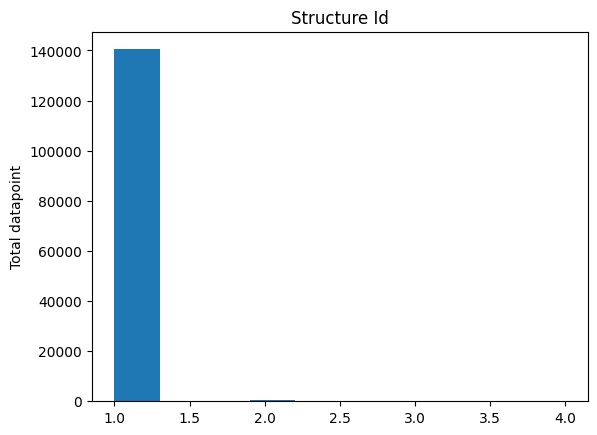

In [12]:
# df['structureId'].value_counts().plot.box()
df['structureId'].value_counts().plot.hist()
plt.ylabel("Total datapoint")
plt.title("Structure Id")

classification (Object): Visualize using a histogram to display the distribution of unique classification

In [13]:
df['classification'].value_counts()

HYDROLASE                           20915
TRANSFERASE                         15777
OXIDOREDUCTASE                      12494
LYASE                                4329
IMMUNE SYSTEM                        4075
                                    ...  
hormone, Transport protein              1
ANTITUMOR PROTEIN/LIGASE                1
CASPASE RECRUITMENT DOMAIN              1
HYDROLASE, Metal binding protein        1
antimicrobial                           1
Name: classification, Length: 5050, dtype: int64

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141401 entries, 0 to 141400
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   structureId               141401 non-null  object 
 1   classification            141399 non-null  object 
 2   experimentalTechnique     141401 non-null  object 
 3   macromoleculeType         137636 non-null  object 
 4   residueCount              141401 non-null  int64  
 5   resolution                128589 non-null  float64
 6   structureMolecularWeight  141401 non-null  float64
 7   crystallizationMethod     96242 non-null   object 
 8   crystallizationTempK      97039 non-null   float64
 9   densityMatthews           124724 non-null  float64
 10  densityPercentSol         124749 non-null  float64
 11  pdbxDetails               118534 non-null  object 
 12  phValue                   105110 non-null  float64
 13  publicationYear           117602 non-null  f

Text(0, 0.5, 'Frequency')

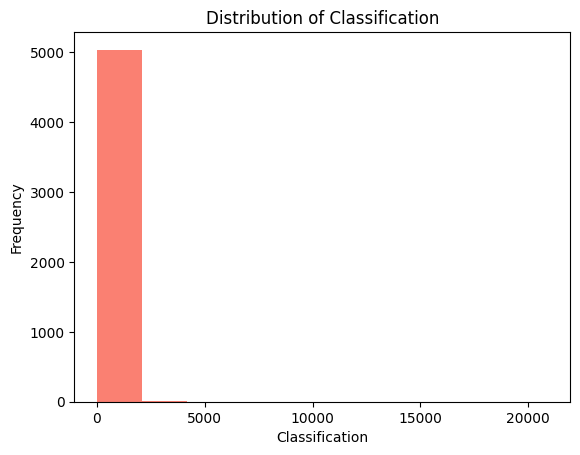

In [15]:
df['classification'].value_counts().plot(kind='hist', color='salmon')
plt.title('Distribution of Classification')
plt.xlabel('Classification')
plt.ylabel('Frequency')

ExperimentalTechnique:  Bar chart to display the distribution of experimental techniques used

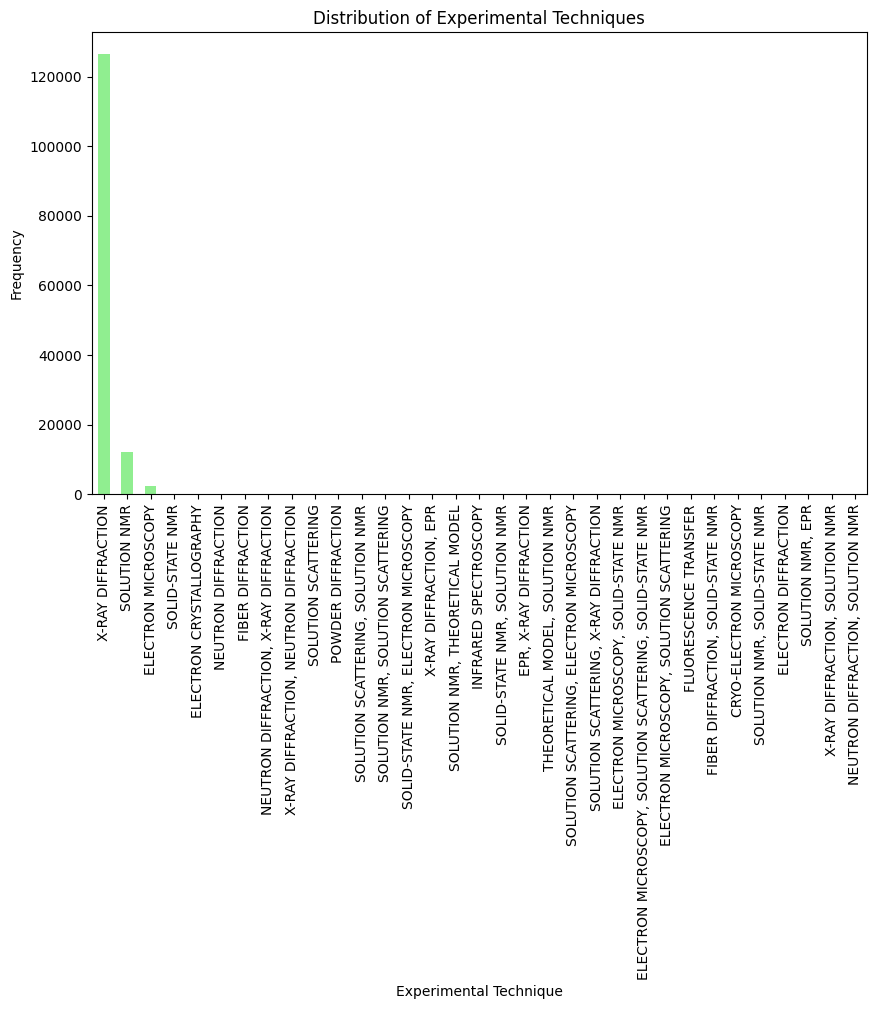

In [16]:
plt.figure(figsize=(10, 6))
df['experimentalTechnique'].value_counts().plot(kind='bar', color='lightgreen')
plt.title('Distribution of Experimental Techniques')
plt.xlabel('Experimental Technique')
plt.ylabel('Frequency')
plt.show()

MacromoleculeType:  Bar chart to display the distribution of macromolecule type used

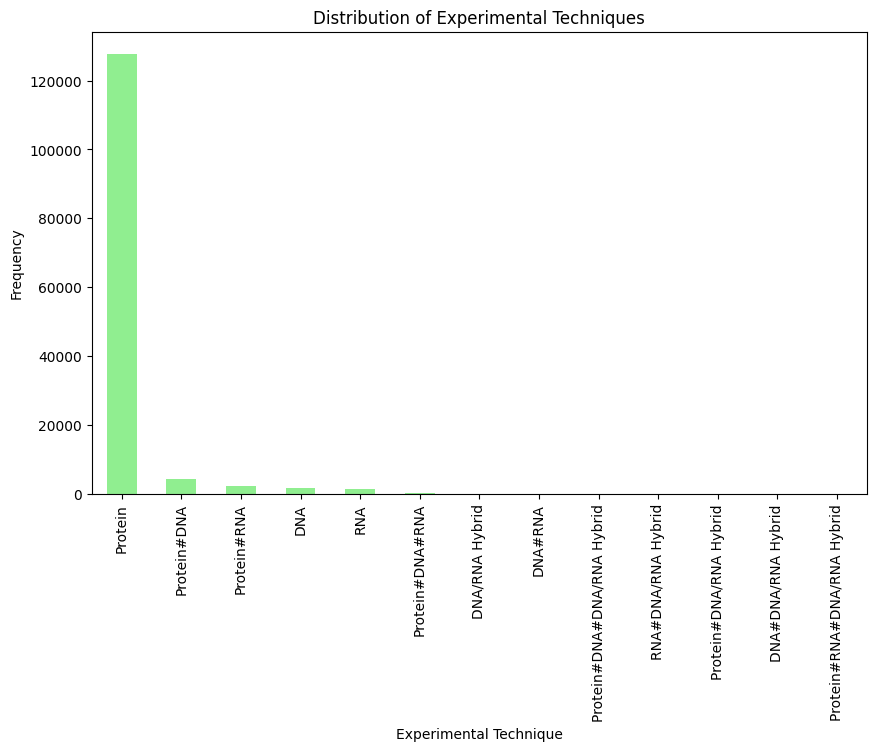

In [17]:
plt.figure(figsize=(10, 6))
df['macromoleculeType'].value_counts().plot(kind='bar', color='lightgreen')
plt.title('Distribution of Experimental Techniques')
plt.xlabel('Experimental Technique')
plt.ylabel('Frequency')
plt.show()

ResidueCount : Display the distribution of residue counts with histogram.

Text(0, 0.5, 'Frequency')

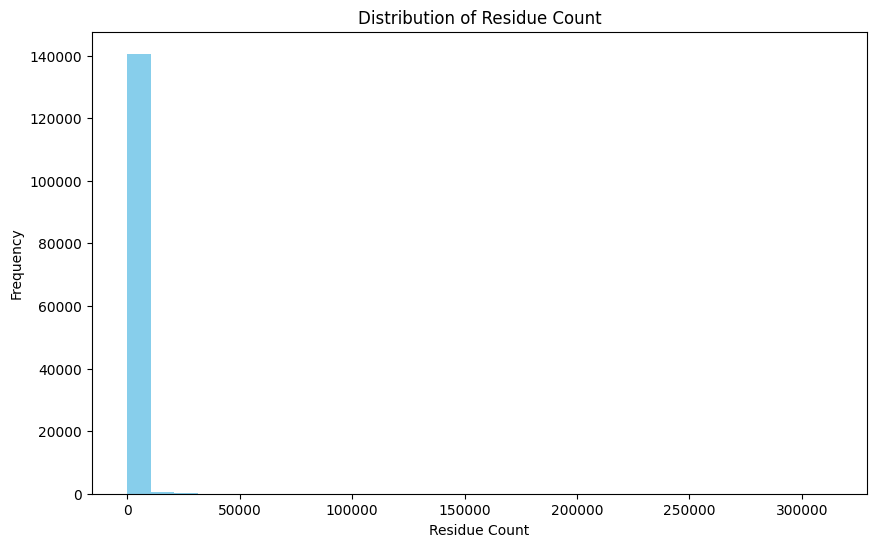

In [18]:
plt.figure(figsize=(10, 6))
df['residueCount'].plot(kind='hist', bins=30, color='skyblue')
plt.title('Distribution of Residue Count')
plt.xlabel('Residue Count')
plt.ylabel('Frequency')

Resolution: Show the distribution of structure resolutions.

Text(0, 0.5, 'Frequency')

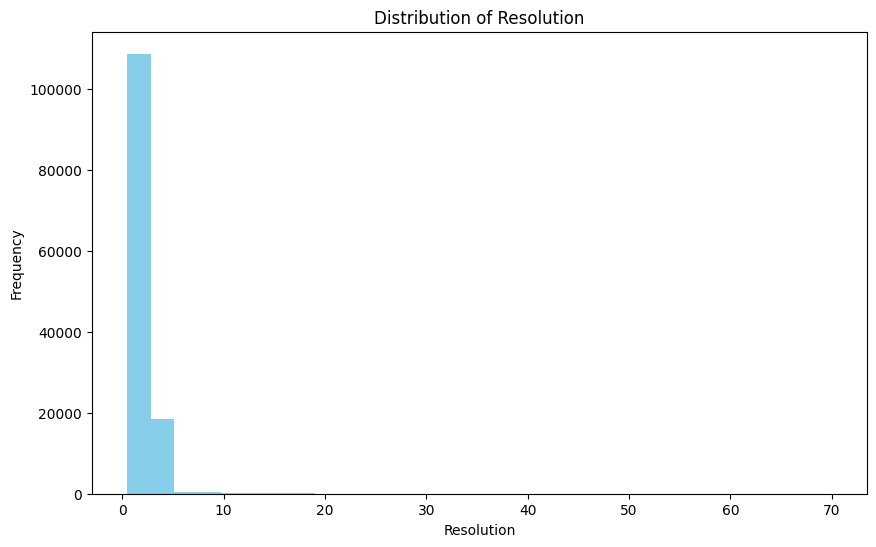

In [19]:
plt.figure(figsize=(10, 6))
df['resolution'].plot(kind='hist', bins=30, color='skyblue')
plt.title('Distribution of Resolution')
plt.xlabel('Resolution')
plt.ylabel('Frequency')

structureMolecularWeight: Histogram to display the distribution of molecular weights.

Text(0, 0.5, 'Frequency')

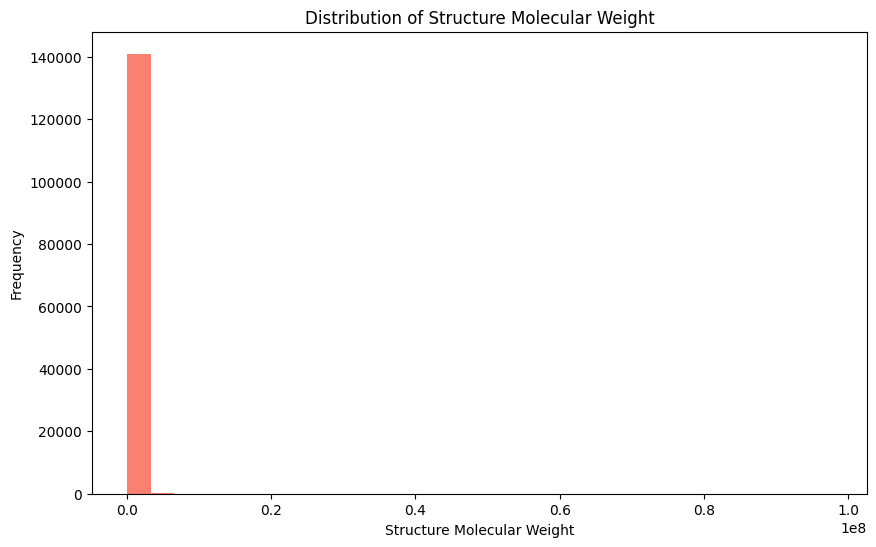

In [20]:
plt.figure(figsize=(10, 6))
df['structureMolecularWeight'].plot(kind='hist', bins=30, color='salmon')
plt.title('Distribution of Structure Molecular Weight')
plt.xlabel('Structure Molecular Weight')
plt.ylabel('Frequency')

Crystallization method has lot of group, so i dont plot it

Histogram to display the distribution of crystallization temperatures.

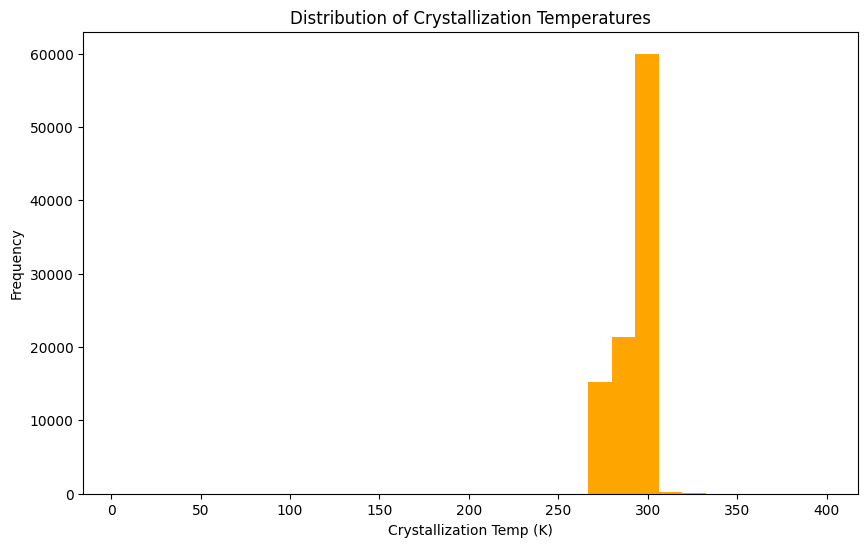

In [21]:
plt.figure(figsize=(10, 6))
df['crystallizationTempK'].plot(kind='hist', bins=30, color='orange')
plt.title('Distribution of Crystallization Temperatures')
plt.xlabel('Crystallization Temp (K)')
plt.ylabel('Frequency')
plt.show()

Histogram to display the distribution of Matthews coefficients

Text(0, 0.5, 'Frequency')

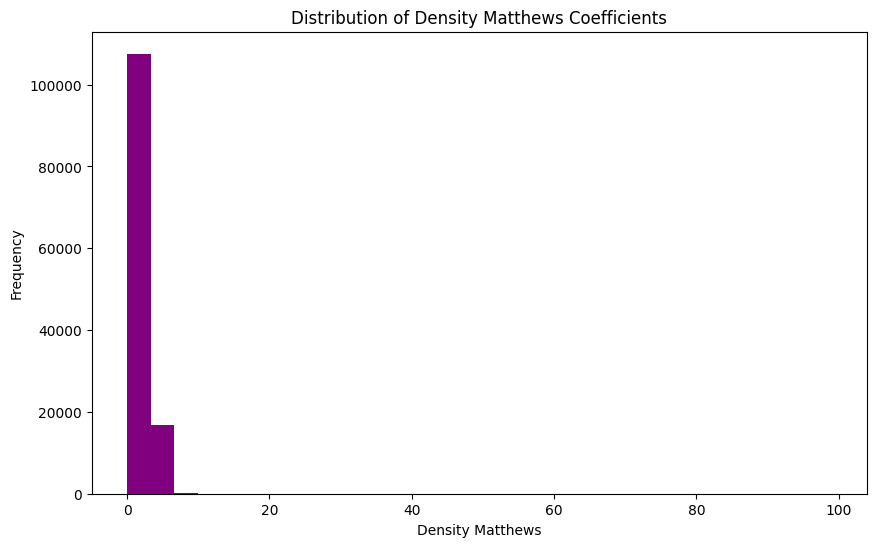

In [22]:
plt.figure(figsize=(10, 6))
df['densityMatthews'].plot(kind='hist', bins=30, color='purple')
plt.title('Distribution of Density Matthews Coefficients')
plt.xlabel('Density Matthews')
plt.ylabel('Frequency')

Histogram to display the distribution of percentage of solvent.

Text(0, 0.5, 'Frequency')

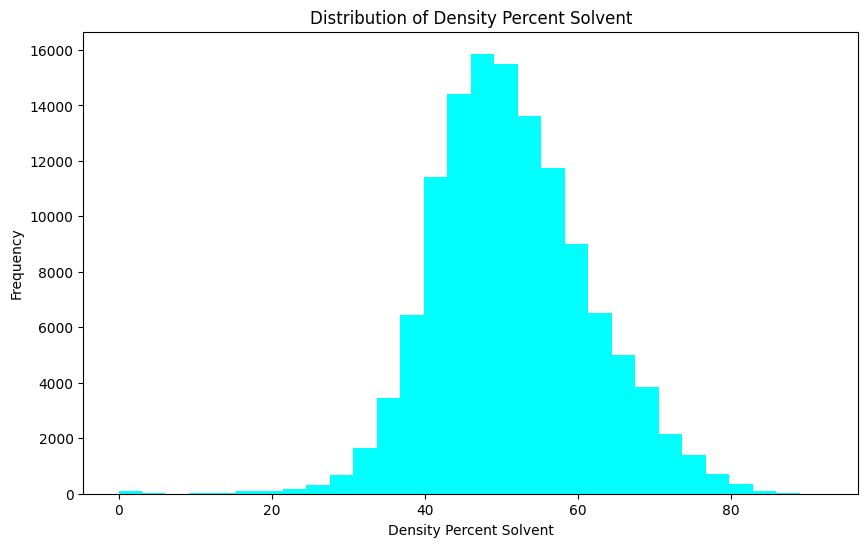

In [23]:
plt.figure(figsize=(10, 6))
df['densityPercentSol'].plot(kind='hist', bins=30, color='cyan')
plt.title('Distribution of Density Percent Solvent')
plt.xlabel('Density Percent Solvent')
plt.ylabel('Frequency')

Histogram to display the distribution of pH values

Text(0, 0.5, 'Frequency')

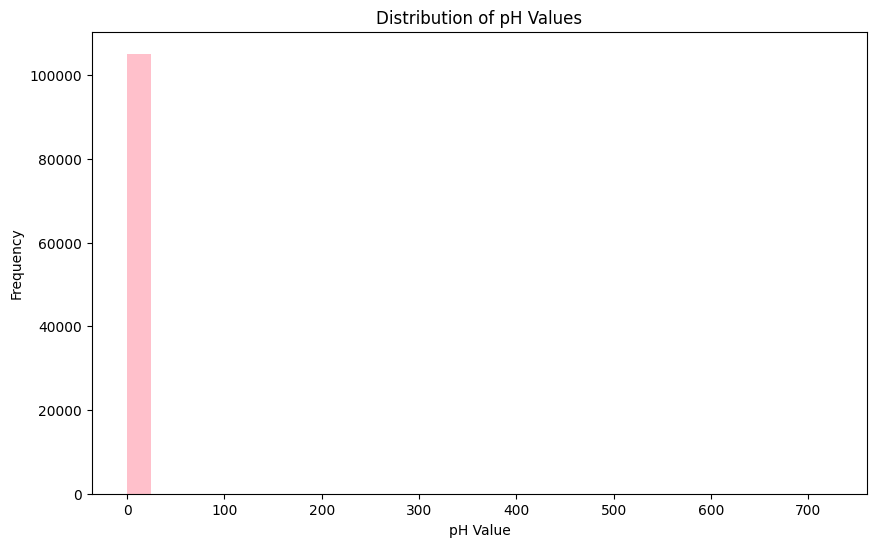

In [24]:
plt.figure(figsize=(10, 6))
df['phValue'].plot(kind='hist', bins=30, color='pink')
plt.title('Distribution of pH Values')
plt.xlabel('pH Value')
plt.ylabel('Frequency')

Bar chart to show the distribution of publication years.

Text(0, 0.5, 'Frequency')

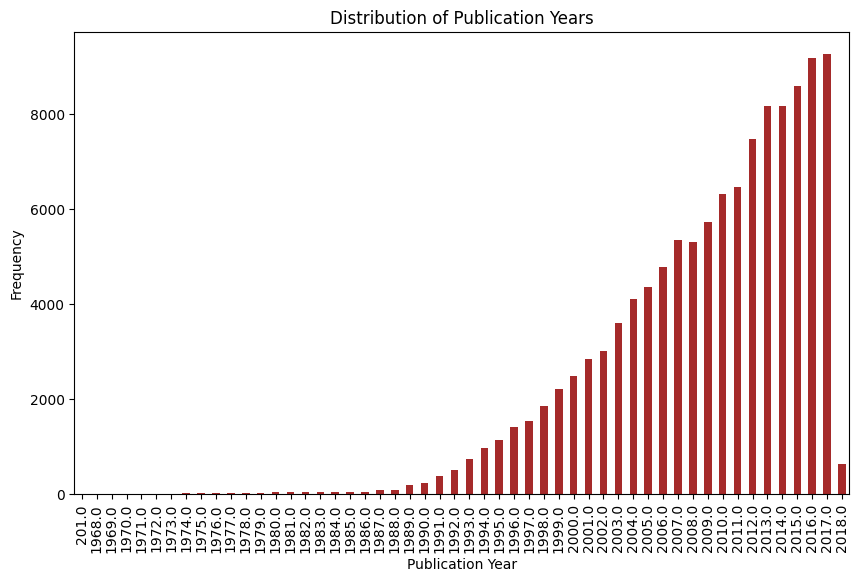

In [25]:
plt.figure(figsize=(10, 6))
df['publicationYear'].value_counts().sort_index().plot(kind='bar', color='brown')
plt.title('Distribution of Publication Years')
plt.xlabel('Publication Year')
plt.ylabel('Frequency')

### pdb_data_seq.csv

Histogram to display the distribution of residue counts

Text(0, 0.5, 'Frequency')

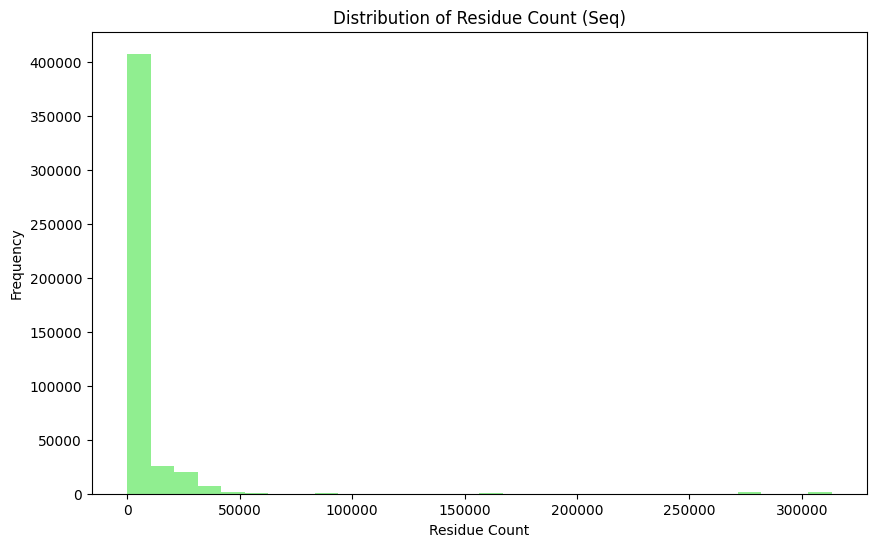

In [26]:
plt.figure(figsize=(10, 6))
seq['residueCount'].plot(kind='hist', bins=30, color='lightgreen')
plt.title('Distribution of Residue Count (Seq)')
plt.xlabel('Residue Count')
plt.ylabel('Frequency')

Visualization for 'sequence' (not recommended for direct visualization) 'sequence' column contains text data

Bar chart to show the distribution of macromolecule types.

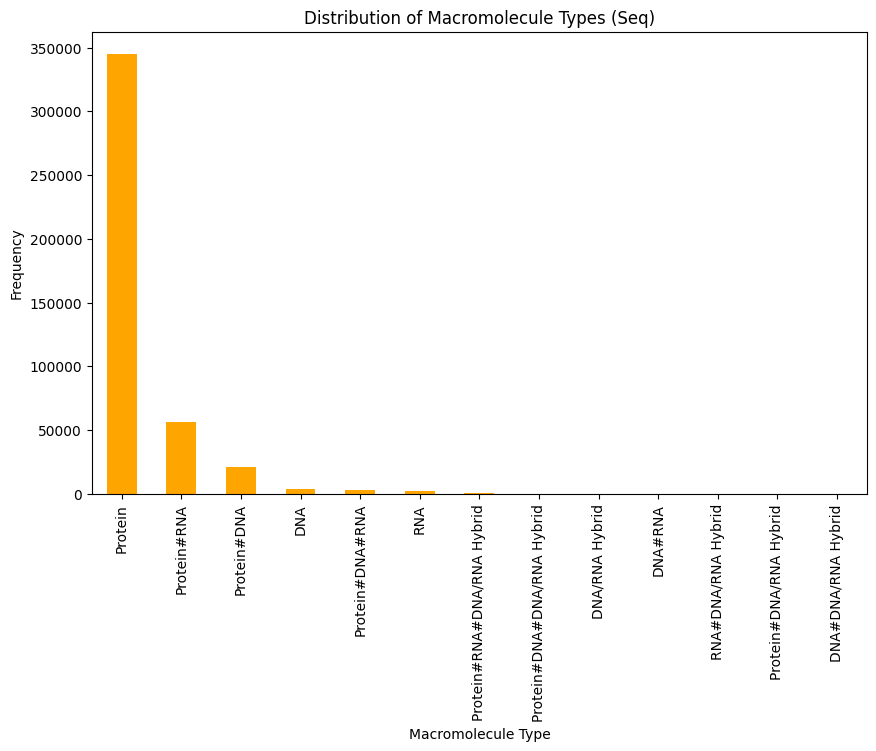

In [27]:
plt.figure(figsize=(10, 6))
seq['macromoleculeType'].value_counts().plot(kind='bar', color='orange')
plt.title('Distribution of Macromolecule Types (Seq)')
plt.xlabel('Macromolecule Type')
plt.ylabel('Frequency')
plt.show()

#### c. What can you infer about the dataset?

Data Completeness:
- The dataset contains information about protein structures from the Protein Data Bank (PDB), including details such as structure IDs, classifications, experimental techniques, macromolecule types, residue counts, resolution, molecular weights, crystallization details, pH values, and publication years
- There are some columns with missing values, such as 'classification', 'macromoleculeType', 'resolution', 'crystallizationMethod', 'crystallizationTempK', 'densityMatthews', 'densityPercentSol', 'pdbxDetails', 'phValue', and 'publicationYear '

Experimental Techniques:
X-ray diffraction appears to be a commonly used technique based on the dataset.

Density Percent Solvent:
Based on the histogram, the density percent solvent has a normal distribution, making it easier to model if this feature is used and affects the target column

Publication Years:
From year to year, the number of samples always increases except in 2018

Macromolecule Type:
dominated by the Protein category

### 2. Data Preprocessing

#### a. What are the types of data preprocessing that you know, and how would they be useful in the given dataset?

- Handling Missing Value: Many columns in the dataset have missing values. Techniques such as imputation (replacing missing values with estimated values like mean, median, or mode) or deletion (removing rows or columns with missing values) can be used to handle this issue.

- Data Cleaning (Remove duplicates, correct errors, and ensure consistency in data formats):
he dataset may contain duplicate entries or inconsistencies that could impact analysis. Cleaning the data ensures accuracy and reliability for downstream tasks

- Outlier Detection: Outliers could affect the analysis. Detecting and either removing or transforming outliers can improve model robustness.

- Categorical columns need to be encoded into numeric format for machine learning models.

- Feature Engineering : Create new features based on existing data to enhance predictive power

#### b. Show that the preprocessing method of your choice works on the dataset

In [28]:
# Handling Missing Values
# Replace missing values in 'resolution' column with median
imputer = SimpleImputer(strategy='median')
df['resolution'] = imputer.fit_transform(df[['resolution']])

In [29]:
# Drop Nan Label because only 2 rows doesnt have classification label
df = df[~df['classification'].isna()]

In [30]:
# Handling Missing Values
# Replace missing values in 'densityPercentSol' column with mean because it's normal distribution
imputer = SimpleImputer(strategy='mean')
df['densityPercentSol'] = imputer.fit_transform(df[['densityPercentSol']])

In [31]:
# Remove outlier
df['phValue'].describe()

count    105110.000000
mean          6.788685
std           2.556819
min           0.000000
25%           6.000000
50%           7.000000
75%           7.500000
max         724.000000
Name: phValue, dtype: float64

In [32]:
# # Calculate the interquartile range (IQR) for 'phValue'
# Q1 = df['phValue'].quantile(0.25)
# Q3 = df['phValue'].quantile(0.75)
# IQR = Q3 - Q1

# # Define the outlier bounds using the IQR method
# lower_bound = Q1 - 1.5 * IQR
# upper_bound = Q3 + 1.5 * IQR

# # Filter out rows where 'phValue' is outside the outlier bounds
# df = df[(df['phValue'] >= lower_bound) & (df['phValue'] <= upper_bound)]

In [33]:
# Because of the missing macroMoleculeType column below 5%, we can drop datapoints that have empty macromolecules
df = df[~df['macromoleculeType'].isna()]

In [34]:
(df['macromoleculeType'].value_counts()/df.shape[0]).head()

Protein        0.928528
Protein#DNA    0.030341
Protein#RNA    0.015701
DNA            0.012671
RNA            0.009409
Name: macromoleculeType, dtype: float64

In [35]:
lst = (df['macromoleculeType'].value_counts()/df.shape[0]).head(4).index.tolist()

In [36]:
# Grouping that below 1% of distribution
df['macromoleculeType'] = df['macromoleculeType'].apply(lambda x : "Other" if x not in lst else x)

In [37]:
# Grouping for df['experimentalTechnique']
lst = df['experimentalTechnique'].value_counts().head(3).index.tolist()

In [38]:
df['experimentalTechnique'] = df['experimentalTechnique'].apply(lambda x: x if x in lst else "Other")

In [39]:
df['crystallizationTempK'].describe()

count    94992.000000
mean       291.011637
std          8.731448
min          4.000000
25%        290.000000
50%        293.000000
75%        295.000000
max        398.000000
Name: crystallizationTempK, dtype: float64

<AxesSubplot:ylabel='Frequency'>

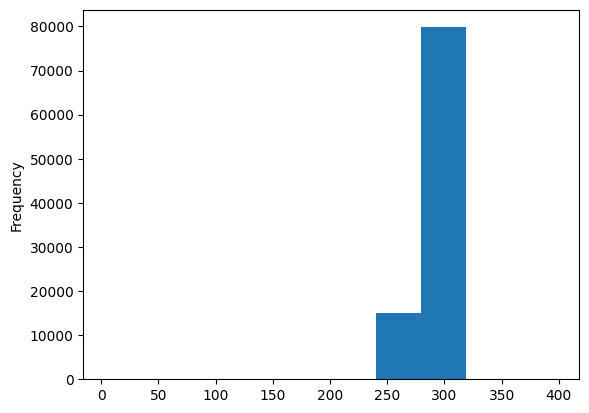

In [40]:
df['crystallizationTempK'].plot.hist()

In [41]:
# Use median to impute 
df['crystallizationTempK'] = df['crystallizationTempK'].fillna(df['crystallizationTempK'].median())

In [42]:
# Because the chart increases every year, I assume the empty publication year column is 2018
df['publicationYear'] = df['publicationYear'].fillna(2018)

In [43]:
# Use impute median
df['densityMatthews'] = df['densityMatthews'].fillna(df['densityMatthews'].median())

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 137634 entries, 0 to 141400
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   structureId               137634 non-null  object 
 1   classification            137634 non-null  object 
 2   experimentalTechnique     137634 non-null  object 
 3   macromoleculeType         137634 non-null  object 
 4   residueCount              137634 non-null  int64  
 5   resolution                137634 non-null  float64
 6   structureMolecularWeight  137634 non-null  float64
 7   crystallizationMethod     94239 non-null   object 
 8   crystallizationTempK      137634 non-null  float64
 9   densityMatthews           137634 non-null  float64
 10  densityPercentSol         137634 non-null  float64
 11  pdbxDetails               115834 non-null  object 
 12  phValue                   102564 non-null  float64
 13  publicationYear           137634 non-null  f

In [45]:
seq.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 467304 entries, 0 to 467303
Data columns (total 5 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   structureId        467304 non-null  object
 1   chainId            467294 non-null  object
 2   sequence           467276 non-null  object
 3   residueCount       467304 non-null  int64 
 4   macromoleculeType  432487 non-null  object
dtypes: int64(1), object(4)
memory usage: 17.8+ MB


#### c. Given a set of columns, we could try to make a prediction on a certain aspect of the dataset. However, there are times when the same column would provide a radically different result from the previous training iteration. What is that phenomenon called, and how can we analyze and mitigate that?

The phenomenon is known as "data instability" or "model variance." This occurs when the performance or outcome of a machine learning model changes significantly across different training iterations, particularly due to changes in the input data or model configuration 
We can analyze and mitigate this issue with :
- Use techniques such as feature importance ranking to understand which features have the most influence on model predictions
- Implement cross-validation techniques to assess model stability across multiple train-test splits of the data
- Identify if there are specific subsets of data or features that contribute more to model variability
- Look for signs of overfitting or underfitting, which can contribute to model instability

### 3. Feature Engineering

#### a. What are features? How do you make one?

Features are individual measurable properties or characteristics extracted from raw data that are used as inputs to a machine learning model for prediction or classification tasks. In the context of classifying proteins based on their properties, features can be derived from various aspects of protein structure, sequence, and biochemical properties.

To create a feature:

1. Identify Relevant Information: Determine which aspects of the data are likely to be important for the classification task.
2. Extract or Compute: Extract or compute specific characteristics or properties from the data that can serve as features.
3. Transform and Preprocess: Process the extracted information into a suitable format (e.g., numeric) for the machine learning model.

#### b. How many features can you think of to classify the proteins?

7

#### c. Based on the previous point, create features based on what you thought of, and explain the logic behind it.

- Sequence Length: Count the sequence from seq data
- ExperimentalTechnique: can be an indicator of how detailed the protein structure is obtained
- MacromoleculeType: This information can provide insight into the type of molecule being classified
- StructureMolecularWeight: This information can relate to the size and complexity of the structure
- densityPercentSol: The percentage of solvent in a protein crystal is related to the crystal structure
- PublicationYear: Trends or developments in protein research may influence classification
- residueCount : The number of residues or amino acids in a protein structure. This size can influence the function or properties of the protein
- resolution : Resolution of the structure determination method. Higher resolution usually produces more detailed structures.
- crystallizationTempK: Crystallization temperature when the experiment was carried out. Temperature variations can affect the formation of crystal structures

In [46]:
# Feature Engineering for total sequence
df = df.set_index("structureId").join(seq.groupby(['structureId']).count()['chainId']).reset_index().rename(columns={"chainId":"total_sequence"})

### 4. Modelling

#### a. What kind of model are you planning to use, and why?

Gradient Boosting Classifier:
Reason for Use: Gradient Boosting methods like XGBoost are powerful for improving predictive accuracy through ensemble learning and robust with outliers. They sequentially build weak learners (decision trees) and optimize the overall model performance.

Random Forest Classifier:
Reason for Use: Random Forest is a versatile and robust ensemble learning method that works well with both categorical and numerical data. It can handle a large number of features and is less prone to overfitting compared to individual decision trees. Random Forest also provides feature importances, which can be useful for understanding which features contribute most to the classification. It also doesn't need scaling the features. 

#### b. Create a model to train the classifier. Can you extract the top important features?

- Sequence Length: Count the sequence from seq data
- ExperimentalTechnique: can be an indicator of how detailed the protein structure is obtained
- MacromoleculeType: This information can provide insight into the type of molecule being classified
- StructureMolecularWeight: This information can relate to the size and complexity of the structure
- densityPercentSol: The percentage of solvent in a protein crystal is related to the crystal structure
- PublicationYear: Trends or developments in protein research may influence classification
- residueCount : The number of residues or amino acids in a protein structure. This size can influence the function or properties of the protein
- resolution : Resolution of the structure determination method. Higher resolution usually produces more detailed structures.
- crystallizationTempK: Crystallization temperature when the experiment was carried out. Temperature variations can affect the formation of crystal structures

In [47]:
df['experimentalTechnique'].value_counts()

X-RAY DIFFRACTION      123256
SOLUTION NMR            12000
ELECTRON MICROSCOPY      1949
Other                     429
Name: experimentalTechnique, dtype: int64

In [48]:
df.head()

,structureId,classification,experimentalTechnique,macromoleculeType,residueCount,resolution,structureMolecularWeight,crystallizationMethod,crystallizationTempK,densityMatthews,densityPercentSol,pdbxDetails,phValue,publicationYear,total_sequence
0,100D,DNA-RNA HYBRID,X-RAY DIFFRACTION,Other,20,1.90,6360.30,"VAPOR DIFFUSION, HANGING DROP",293.0,1.78,30.89,"pH 7.00, VAPOR DIFFUSION, HANGING DROP",7.0,1994.0,2
1,101D,DNA,X-RAY DIFFRACTION,DNA,24,2.25,7939.35,NaN,293.0,2.00,38.45,NaN,NaN,1995.0,2
2,101M,OXYGEN TRANSPORT,X-RAY DIFFRACTION,Protein,154,2.07,18112.80,NaN,293.0,3.09,60.20,"3.0 M AMMONIUM SULFATE, 20 MM TRIS, 1MM EDTA, ...",9.0,1999.0,1
3,102D,DNA,X-RAY DIFFRACTION,DNA,24,2.20,7637.17,"VAPOR DIFFUSION, SITTING DROP",277.0,2.28,46.06,"pH 7.00, VAPOR DIFFUSION, SITTING DROP, temper...",7.0,1995.0,2
4,102L,HYDROLASE(O-GLYCOSYL),X-RAY DIFFRACTION,Protein,165,1.74,18926.61,NaN,293.0,2.75,55.28,NaN,NaN,1993.0,1


In [49]:
selected_features = ['experimentalTechnique', 'macromoleculeType', 'structureMolecularWeight',
                     'densityPercentSol', 'publicationYear', 'total_sequence', 'crystallizationTempK',
                     'densityMatthews', 'residueCount', 'resolution']
X = df[selected_features].copy()

# Handle categorical features using one-hot encoding
X = pd.get_dummies(X, columns=['experimentalTechnique', 'macromoleculeType'])

# Prepare the target variable (classification labels)
y = df['classification']


# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Use LabelEncoder to convert categorical labels to numeric labels
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
# Initialize and train XGBoost Classifier
xgb_classifier = XGBClassifier(random_state=42)
xgb_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred = xgb_classifier.predict(X_test)

# Decode numeric predictions back to original categorical labels
y_pred_decoded = label_encoder.inverse_transform(y_pred)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# View classification report
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

In [ ]:
# Plot feature importance
feature_importances = xgb_classifier.feature_importances_
sorted_idx = np.argsort(feature_importances)[::-1]
features_names = X_train.columns

plt.figure(figsize=(10, 6))
plt.bar(range(len(feature_importances)), feature_importances[sorted_idx], align='center')
plt.xticks(range(len(feature_importances)), np.array(features_names)[sorted_idx], rotation=90)
plt.title("Feature Importance")
plt.ylabel("Importance Score")
plt.show()

### 5. Evaluation

#### a. What are the metrics typically used in the classifier you have made? And what is the metric of your choice here?

- Accuracy measures the overall correctness of the classifier and is calculated as the ratio of correctly predicted instances to the total instances.
- Precision measures the proportion of true positive predictions (correctly predicted positive instances) among all instances predicted as positive.
- Recall measures the proportion of true positive predictions among all actual positive instances.
- F1-score is the harmonic mean of precision and recall, providing a balance between precision and recall.
- Confusion Matrix: A confusion matrix provides a tabular summary of actual vs. predicted class labels, which is helpful in understanding the performance of the classifier across different classes.
- ROC AUC : ROC (Receiver Operating Characteristic) curve plots the true positive rate (sensitivity) against the false positive rate (1 - specificity) at various threshold settings.
AUC represents the area under the ROC curve, which provides a single value to summarize the classifier's performance across all thresholds.

for imbalanced datasets where classes are unevenly distributed, metrics like precision, recall, and F1-score are more informative.

#### b. Provide a visualization of the metrics of your choice

#### c. Based on what you have done, what do you think can be improved from your model?